This project will not delve deep into problem analysis and observations based on domain knowledge. Instead, it will simply experiment with various methods mentioned in chapters 6 and 7 of the book "Python Machine Learning" by authors Sebastian Raschka and Vahid Mirjalili

# Dataset's Description

The dataset information for diagnosing breast cancer consists of 569 rows and 32 columns:

The first column represents the patient's ID.

The second column is a categorical variable with 2 values: "M" (malignant) and "B" (benign). These values are the labels for classification or prediction.

The remaining columns contain various measurements related to the diagnosis. For more details, refer to: Breast Cancer Wisconsin (Diagnostic) dataset.
    https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

# Classification Pipeline Algorithm

In Python, a pipeline is a convenient way to streamline a lot of routine processes, typically in machine learning workflows. A pipeline sequentially applies a list of processing steps, making it easier to organize and manage complex workflows. It's commonly used in tasks like data preprocessing, feature engineering, and model training.



1. Drop unnecessary columns, if any. Separate label column ($y$) and features ($X$).

2. Encode label $y$ into numerical format.

3. Split the dataset into training/testing sets.


4. Create the pipeline:

  Use the built-in function $make_pipeline$ from sklearn, with inputs:

    - Normalization function: $StandardScaler(), MinMaxScaler(),...$

    - Dimensionality reduction function (e.g., PCA, LDA, SVD).

    - Classification or regression function (e.g., $LogisticRegression(), LinearRegression(),...$).

> You can omit normalization or dimensionality reduction steps if necessary.

5. Train to discover patterns.

6. Predict on the test set or new values.

7. Evaluate results, adjust parameters in step (4) if needed.

In [ ]:
|from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA                   # dimensional reduction
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from os import pipe
from sklearn.preprocessing import LabelEncoder
import pandas as pd                                     # read files, processing
import numpy as np                                      # working with matrices
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

## 1. Read files

The dataset has been preprocessed previously.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/rasbt/python-machine-learning-book/master/code/datasets/wdbc/wdbc.data', header=None)

## 2. Label encoder

In [ ]:
X = df.loc[:, 2:].values # (569, 30)
y = df.loc[:, 1].values # (569,)
le = LabelEncoder()
y = le.fit_transform(y)

## 3. Split the dataset into training/testing sets.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20,     # the test set ratio (commonly 70-30 or 80-20).
                                                    stratify = y,       # maintain the proportional label ratio of the declared variable.
                                                    random_state = 1)   # an arbitrary positive integer to maintain dataset consistency across iterations.

## 4+5+6. Create the pipeline, Training and Testing

In [ ]:
pipe_lr = make_pipeline(StandardScaler(), PCA(n_components = 2), LogisticRegression(random_state=1))
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Test Acurracy: %.3f' % pipe_lr.score(X_test,y_test))

Test Acurracy: 0.956


We can skip the normalization step in the pipeline and keep the remaining steps unchanged.

In [ ]:
pipe_lr2 = make_pipeline(PCA(n_components = 2), LogisticRegression())
pipe_lr2.fit(X_train, y_train)
y_pred = pipe_lr2.predict(X_test)
print('Test Acurracy: %.3f' % pipe_lr2.score(X_test,y_test))

Test Acurracy: 0.956


We can try to pass the dimension reduction step.

In [ ]:
pipe_lr2 = make_pipeline(StandardScaler(), LogisticRegression())
pipe_lr2.fit(X_train, y_train)
y_pred = pipe_lr2.predict(X_test)
print('Test Acurracy: %.3f' % pipe_lr2.score(X_test,y_test))

Test Acurracy: 0.982


Thay bộ phân loại Logistic thành Cây phân loại

In [ ]:
pipe_lr2 = make_pipeline(StandardScaler(), PCA(n_components = 2), DecisionTreeClassifier())
pipe_lr2.fit(X_train, y_train)
y_pred = pipe_lr2.predict(X_test)
print('Test Acurracy: %.3f' % pipe_lr2.score(X_test,y_test))

Test Acurracy: 0.939


# K-fold Cross-validation Algorithm

K-fold cross-validation is a technique used to assess the performance and generalization ability of a machine learning model. It involves dividing the dataset into K subsets (folds) and then iteratively training and evaluating the model K times. In each iteration, one of the K folds is used as the test set, and the remaining K-1 folds are used for training. The process is repeated K times, with each fold serving as the test set exactly once.

1. Initialize the $K-fold$ function.

2. Save accuracy scores for each fold.

3. Initialize the pipeline as in section 6.1.

4. Initiate a loop with the number of folds, (train, test) where train and test are the indices of the training fold and testing fold obtained in step 1.

    4.1 Train the model on the training fold.

    4.2 Evaluate accuracy on the testing fold.

    4.3 Add accuracy to the array of scores saved in step 2.

5. Repeat the loop until all K folds have been processed.

6. Calculate the mean and standard deviation of all scores.

7. Reattempt using the $cross_val_score$ function.

8. Evaluate on the test set.

In [ ]:
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=10,                                  # Number of folds
                        random_state = None).split(X_train, y_train)
scores = []
for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    print('Fold: %2d, Class dist.: %s, Acc: %.3f'
          % (k+1, np.bincount(y_train[train]), score))

Fold:  1, Class dist.: [256 153], Acc: 0.935
Fold:  2, Class dist.: [256 153], Acc: 0.935
Fold:  3, Class dist.: [256 153], Acc: 0.957
Fold:  4, Class dist.: [256 153], Acc: 0.957
Fold:  5, Class dist.: [256 153], Acc: 0.935
Fold:  6, Class dist.: [257 153], Acc: 0.956
Fold:  7, Class dist.: [257 153], Acc: 0.978
Fold:  8, Class dist.: [257 153], Acc: 0.933
Fold:  9, Class dist.: [257 153], Acc: 0.956
Fold: 10, Class dist.: [257 153], Acc: 0.956


In [ ]:
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))


CV accuracy: 0.950 +/- 0.014


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=pipe_lr,X=X_train,y=y_train,cv=10,n_jobs=1)
print('CV accuracy scores: %s' % scores)

CV accuracy scores: [0.93478261 0.93478261 0.95652174 0.95652174 0.93478261 0.95555556
 0.97777778 0.93333333 0.95555556 0.95555556]


In [ ]:
pipe_lr.score(X_test, y_test)

0.9473684210526315

# Evaluation through graphs and curves

1. Initialize a custom pipeline.

2. Choose the indices of the training fold and calculate scores for the training and testing folds using the learning_curve function in sklearn.

  Input parameters include:

    - estimator: the pipeline just initialized.

    - train_sizes: range of values.

    - cv: the number of k-folds.

  Output includes:

    - training_size: an array of training set lengths.

    - train_scores: accuracy on the training set.

    - test_scores: accuracy on the testing set.

    - Calculate the mean and standard deviation of the two scores.

3. Plot the results.

4. Plot the confidence interval for the training set using plt.fill_between with parameters:

    - train_sizes: obtained in step 3.

    - (train_mean + train_std, train_mean - train_std): obtained in step 4.

  Repeat the process for the validation set.

5. Create the grid.

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
    'machine-learning-databases'
    '/breast-cancer-wisconsin/wdbc.data', header=None)

X = df.loc[:, 2:].values
y = df.loc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y,random_state=1)

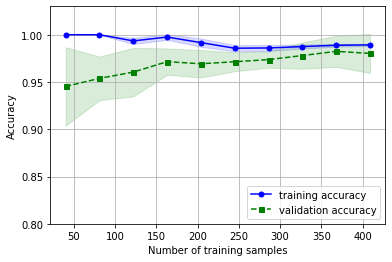

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Initialize a pipeline with 2 normalization steps and a Logistic regression classifier.
pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2',random_state=1))

# Evaluate the score based on learning curves.
train_sizes, train_scores, test_scores =\
learning_curve(estimator=pipe_lr, X=X_train, y=y_train,
               train_sizes=np.linspace(0.1, 1.0, 10), cv=10)

# Calculate the row-wise mean values
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Standard deviation of the test set along the rows
test_std = np.std(test_scores, axis=1)

# Visualization
plt.plot(train_sizes, train_mean,color='blue', marker='o',
         markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean,color='green', linestyle='--',
         marker='s', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std,
                 test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.show()

# Prevent overfitting and underfitting issues with validation curves

1. Initialize the range of parameter values.

2. Initialize a custom pipeline.

3. Calculate train_score and test_score using the validation_curve function from sklearn.

4. Calculate the mean and standard deviation of the two scores.

5. Plot similar to the previous section.

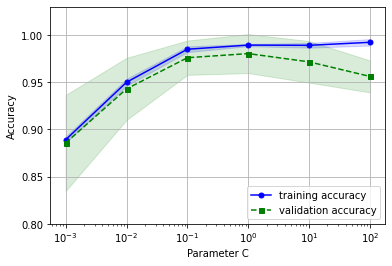

In [ ]:
# The function to avoid error warning messages
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import validation_curve

# Initialize the parameter value range
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

# Initialize validation curves
train_scores, test_scores = validation_curve(estimator=pipe_lr,X=X_train,y=y_train,
                                             param_name='logisticregression__C',
                                             param_range=param_range,cv=10)

# Calculate the mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Visualization
plt.plot(param_range, train_mean,color='blue', marker='o',
         markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,color='blue')
plt.plot(param_range, test_mean,color='green', linestyle='--',
         marker='s', markersize=5,label='validation accuracy')
plt.fill_between(param_range,test_mean + test_std,
                 test_mean - test_std,alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.03])
plt.show()

## Tuning hyperparameters by Grid search

Grid search is a hyperparameter tuning technique used in machine learning to systematically search through a predefined set of hyperparameter values for a given model. The goal is to find the combination of hyperparameters that yields the best performance on a specific metric, such as accuracy or mean squared error.

1. Initialize a custom pipeline.

2. Initialize an array of parameter value ranges.

3. Create a grid.

  Specifically, for example, using the SVM algorithm, the parameters include:

  - svc__C, svc__gamma: numeric arrays containing the range of values selected in step 2.

  - svc__kernel: a character array containing the names of the linear or kernel functions in SVM.

  With Logistic Regression, created by the group, the parameters include:

  - C: the coefficient in the Logistic formula, choose a value range, for example, np.logspace(-3, 3, 7).

  - penalty: constraint on the weights added with Lasso l1 or Ridge l2.

4. Initialize the grid search algorithm using the GridSearchCV function in sklearn.

  Parameters include:

  - estimator: the pipeline from step 1.

  - param_grid: the grid created in step 3.

  - scoring: the accuracy calculation method, default is 'accuracy'.

  - cv: the number of k-folds.

5. Train, calculate accuracy, and print optimal parameters.

6. Calculate accuracy and optimal parameters.

7. Use the optimal parameters from step 6 to retrain on X_train, y_train.

8. Use the trained model to calculate accuracy on the test set.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
pipe_svc = make_pipeline(StandardScaler(), SVC(random_state=1))
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'svc__C': param_range,
               'svc__kernel': ['linear']},
              {'svc__C': param_range,
               'svc__gamma': param_range,
               'svc__kernel': ['rbf']}]
gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid,scoring='accuracy',cv=10, n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9846859903381642
{'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}


In [ ]:
clf = gs.best_estimator_
clf.fit(X_train, y_train)
print('Test accuracy: %.3f' % clf.score(X_test, y_test))

Test accuracy: 0.974


LogisticRegression:

In [ ]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]} # l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print(logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

{'C': 100.0, 'penalty': 'l2'}
accuracy : 0.9429951690821256


# Choosing algorithm by Nested cross-validation


Nested cross-validation is a variant of cross-validation. It is used for model evaluation that combines the concepts of both model selection and performance estimation. It involves using an outer loop of cross-validation for performance estimation and an inner loop of cross-validation for hyperparameter tuning or model selection.

1. Initialize a pipeline and a custom parameter value range (param_grid).

2. Create a grid search for the inner loop.

3. Parameters include:

  - estimator: the pipeline created in step 1.

  - param_grid: the customized parameter value range initialized in step 1.

  - scoring: default to calculate accuracy.

  - cv: 2 because of splitting into 2 sets (validation-test).

4. Perform cross-validation with the grid search from step 2 using 5-fold cross-validation.

5. Calculate the mean and standard deviation of the scores.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# SVM
gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring='accuracy',cv=2) #inner loop
scores = cross_val_score(gs, X_train, y_train, scoring='accuracy', cv=5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

# DecisionTree
gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                  param_grid=[{'max_depth': [1, 2, 3,4, 5, 6, 7, None]}],scoring='accuracy',cv=2)
scores = cross_val_score(gs, X_train, y_train,scoring='accuracy', cv=5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

CV accuracy: 0.974 +/- 0.015
CV accuracy: 0.934 +/- 0.016


# Examine various performance evaluation metrics

# Confusion matrix

A confusion matrix is a table that is often used to evaluate the performance of a classification algorithm on a set of data for which the true values are known. It provides a summary of the predictions made by a classification model compared to the actual true values.


We can create an confusion metrix by pandas library:


In [ ]:
y_actu = pd.Series([2, 0, 2, 2, 0, 1, 1, 2, 2, 0, 1, 2], name='Actual')
y_pred = pd.Series([0, 0, 2, 1, 0, 2, 1, 0, 2, 0, 2, 2], name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
df_confusion

Predicted,0,1,2,All
Actual,,,,
0,3,0,0,3
1,0,1,2,3
2,2,1,3,6
All,5,2,5,12


Or using sklearn:


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/rasbt/python-machine-learning-book/master/code/datasets/wdbc/wdbc.data', header=None)
X = df.loc[:, 2:].values
y = df.loc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [ ]:
from sklearn.pipeline import Pipeline

# Construct pipeline for SVC
pipe_svc = Pipeline([('scl', StandardScaler()),
                     ('clf', SVC(random_state=1))])

In [ ]:
from sklearn.metrics import confusion_matrix

# Train the model
pipe_svc.fit(X_train, y_train)

# Obtain predicted label
y_pred = pipe_svc.predict(X_test)

# Print confusion matrix
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[71  1]
 [ 2 40]]


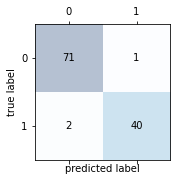

In [ ]:
# Plot the confusion matrix illustration using matplotlib's matshow function
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(2.5, 2.5)) # Tạo khung và độ lớn
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3) # vẽ hình dưới dạng biểu đồ nhiệt

# Visualization
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

# Tuning the model for optimizing both accuracy and sensitivity in a classification model

We can count the precision, recall, F-1 by the formular:

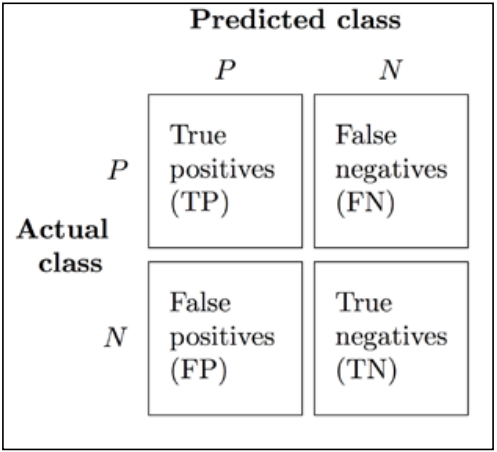

$$
    PRE = \frac{TP}{TP+FP}
$$

In [ ]:
40 / (40+1)

0.975609756097561

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score
print('Precision: ', precision_score(y_true=y_test, y_pred=y_pred))

Precision:  0.975609756097561


$$
    REC = \frac{TP}{TP+FN}
$$

In [ ]:
40 / (40+2)

0.9523809523809523

In [ ]:
print('Recall: ', recall_score(y_true=y_test, y_pred=y_pred))

Recall:  0.9523809523809523


$$
    F1-score = 2\frac{PRE\text x REC}{PRE+REC}
$$

In [ ]:
2* (40 / (40+1)) * (40 / (40+2)) / ((40 / (40+1) + 40 / (40+2)))

0.963855421686747

In [ ]:
print('F1: ', f1_score(y_true=y_test, y_pred=y_pred))

F1:  0.963855421686747


## Combine GridSearch with F1-score

In [ ]:
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(random_state=1))
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test Accuracy: 0.947


In [ ]:
import sklearn

pipe_svc = sklearn.pipeline.make_pipeline(StandardScaler(),
                         SVC(random_state=1))
# Valid curve
param_range = [0.0001, 0.001, 0.01, 0.1,
              1.0, 10.0, 100.0, 1000.0]

# Set up parameterds
param_grid = [{'svc__C': param_range,
               'svc__kernel': ['linear']}, # Linear SVM
              {'svc__C': param_range,
               'svc__gamma': param_range,
               'svc__kernel': ['rbf']}] # Kernel

gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10,
                  n_jobs=-1)

gs = gs.fit(X_train, y_train)

gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=2)
scores = cross_val_score(gs, X_train, y_train,
                         scoring='accuracy', cv=5)

gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                  param_grid=[{'max_depth':
                               [1, 2, 3, 4, 5, 6, 7, None]}],
                  scoring='accuracy', cv=2)
scores = cross_val_score(gs, X_train, y_train,
                         scoring='accuracy', cv=5)

In [ ]:
from sklearn.metrics import make_scorer, f1_score
scorer = make_scorer(f1_score, pos_label=0)
gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring=scorer,
                  cv=10)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)

0.98287253786131


# ROC and AUC Curves

ROC Curve:
The ROC curve is a graphical representation of the trade-off between true positive rate (sensitivity) and false positive rate (1 - specificity) for different threshold values. It helps visualize the performance of a classification algorithm across various decision boundaries.

AUC (Area Under the Curve):
The AUC is a single scalar value that summarizes the performance of a classification model across all possible classification thresholds. It represents the area under the ROC curve. A model with a higher AUC generally indicates better discrimination between positive and negative instances.

> Note: The code below is for visualization purposes only. Because the previous examples had very high metrics and were not significantly different, the author selected a subset of the dataset and performed cross-validation with a very small k to generate multiple cases.

1. Perform cross-validation.

2. Initialize corresponding parameters.

3. Initialize the pipeline and train the model.

4. Predict the test set probabilities using the predict_proba function.

5. Plot the ROC curve based on step 4.

Additionally, if using multiple k as the author did, there are additional steps:

6. Calculate the average of the k-folds and plot the results.

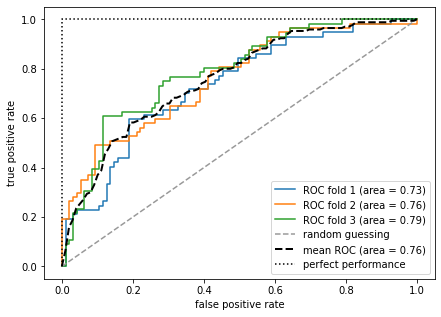

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from scipy import interp
# Split dataset, 20% test, 80% train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
                        train_test_split(X, y,
                                         test_size=0.20,
                                         stratify=y,
                                         random_state=1)

X_train2 = X_train[:, [4, 14]]
cv = list(StratifiedKFold(n_splits=3,
                          random_state=None).split(X_train,
                                                y_train))
fig = plt.figure(figsize=(7, 5))
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(random_state=1))
pipe_lr.fit(X_train, y_train)

for i, (train, test) in enumerate(cv):
    probas = pipe_lr.fit(X_train2[train],
                         y_train[train]).predict_proba(X_train2[test])
    fpr, tpr, thresholds = roc_curve(y_train[test],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr,
             label='ROC fold %d (area = %0.2f)'
             % (i+1, roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color=(0.6, 0.6, 0.6),
         label='random guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--', label='mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':',
         color='black', label='perfect performance')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc="lower right")
plt.show()

# Assembling models

# Majority Voting

Voting based on modes and weights

In [ ]:
import numpy as np
np.argmax(np.bincount([0, 0, 1], weights=[0.2, 0.2, 0.6]))

1

Based on probability and weights

In [ ]:
ex = np.array([[0.9, 0.1],
               [0.8, 0.2],
               [0.4, 0.6]])
# Mean prob * weights
p = np.average(ex, axis=0, weights=[0.2, 0.2, 0.6])
print(p)
np.argmax(p)

1. Initialize arrays for votes and weights, $X_{m \text n}, y_m$.

2. Initialize classifiers.

3. Initialize pipelines for normalization, dimensionality reduction (if necessary).

4. Store steps 2 and 3 in the same array.

5. Label Encode $y$.

6. Run a loop for each classifier in the array from step 4, fit $X$ with each classifier. The returned result will be the predictions of the classifiers.

7. Combine the results in step 6 to predict new values based on probability or class label.

  7.1 If predicting based on class labels, use the predict function of sklearn. The returned result is an array ${y_i}_m$ with $i = 1,2,...,k$ labels, $m$ is the length of the array.

    - 7.1.1 Combine and merge into an array $y$ with shape (m, k) to take the mode.

    - 7.1.2 For each element $j$ belonging to $m$, take the mode of $y_j$ to get the corresponding label.

  7.2 If predicting based on probabilities, use the predict_proba function of sklearn. The returned result will have a shape of (k, m, l) with k as the number of classifiers, m as the length of X, and l as the probability of each label.

    - 7.2.1 Calculate the average probability of k classifiers for each $y_m$.

    - 7.2.2 Take the label with the highest probability.

8. Reverse encode $y$.

In [ ]:
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
from sklearn.preprocessing import LabelEncoder
import six
from sklearn.base import clone
from sklearn.pipeline import _name_estimators
import numpy as np
import operator

class MajorityVoteClassifier(BaseEstimator, ClassifierMixin):
    # Initialize the necessary parameters, including: the classifier, label names, and weights.
    def __init__(self, classifiers,
                 vote='classlabel', weights=None):
        self.classifiers = classifiers
        self.named_classifiers = {key: value
                                  for key, value in _name_estimators(classifiers)} # Accessing each parameter of classifiers
        self.vote = vote
        self.weights = weights

    def fit(self, X, y):
        self.lablenc_ = LabelEncoder() # label encoder
        self.lablenc_.fit(y)
        self.classes_ = self.lablenc_.classes_ # Accessing the classes after encoding
        self.classifiers_ = []
        for clf in self.classifiers:
            fitted_clf = clone(clf).fit(X,
                                        self.lablenc_.transform(y)) # Fit X with labels y that have been encoded based on the classifier
            self.classifiers_.append(fitted_clf)
        return self

    def predict(self, X):

        # Predict based on probability
        if self.vote == 'probability':
            maj_vote = np.argmax(self.predict_proba(X),
                                 axis=1) # return highest prob
        # Predict based on mode
        else:
            predictions = np.asarray([clf.predict(X)
                                      for clf in self.classifiers_]).T
            maj_vote = np.apply_along_axis(lambda x:
                                           np.argmax(np.bincount(x,
                                                                 weights=self.weights)),
                                           axis=1,
                                           arr=predictions)
        maj_vote = self.lablenc_.inverse_transform(maj_vote) # reverse label encoder
        return maj_vote

    # Return mean probability
    def predict_proba(self, X):
        probas = np.asarray([clf.predict_proba(X) for clf in self.classifiers_]) # counting each classifier's prob
        avg_proba = np.average(probas, axis=0, weights=self.weights) # counting mean prob
        return avg_proba

In [ ]:
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
from sklearn.preprocessing import LabelEncoder
import six
from sklearn.base import clone
from sklearn.pipeline import _name_estimators
import numpy as np
import operator
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
import numpy as np

# 1.
iris = datasets.load_iris()
X, y = iris.data[50:, [1, 2]], iris.target[50:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,
                                                    random_state = 2021, #
                                                    stratify=y)
classifiers_ = []
vote = 'probability'
weights = [1, 1, 1]

# 2.
clf1 = LogisticRegression(penalty='l2', C=0.001, random_state=1)
clf2 = DecisionTreeClassifier(max_depth=1, criterion='entropy', random_state=0)
clf3 = KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski')

# 3.
pipe1 = Pipeline([['sc', StandardScaler()], ['clf', clf1]])
pipe3 = Pipeline([['sc', StandardScaler()], ['clf', clf3]])
clf_labels = ['Logistic regression', 'Decision tree', 'KNN']

# 4.
classifiers = [pipe1, clf2, pipe3]

# 5.
lablenc_ = LabelEncoder()
y = lablenc_.fit_transform(y)
lablenc_.fit(y)

# 6.
for clf in classifiers:
    fitted_clf = clone(clf).fit(X_train, lablenc_.fit_transform(y_train))
    classifiers_.append(fitted_clf)
classifiers_

[Pipeline(steps=[('sc', StandardScaler()),
                 ['clf', LogisticRegression(C=0.001, random_state=1)]]),
 DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0),
 Pipeline(steps=[('sc', StandardScaler()),
                 ['clf', KNeighborsClassifier(n_neighbors=1)]])]

In [ ]:
# 7.1.1
predictions = np.asarray([clf.predict(X)
                            for clf in classifiers_]).T
# 7.1.2
maj_vote = np.apply_along_axis(lambda x:
                   np.argmax(np.bincount(x,
                                         weights=weights)),
                   axis=1,
                   arr=predictions)
maj_vote = lablenc_.inverse_transform(maj_vote)

In [ ]:
# 7.2
probas = np.asarray([clf.predict_proba(X) for clf in classifiers_])

# 7.2.1
avg_proba = np.average(probas, axis=0, weights=weights)

# 7.2.2
maj_vote = np.argmax(avg_proba, axis=1)

In [ ]:
# 8.

maj_vote = lablenc_.inverse_transform(maj_vote)

Summary, we can shorten all the previous code

In [ ]:
clf1 = LogisticRegression(penalty='l2', C=0.001, random_state=1)
clf2 = DecisionTreeClassifier(max_depth=1, criterion='entropy', random_state=0)
clf3 = KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski')

pipe1 = Pipeline([['sc', StandardScaler()], ['clf', clf1]])
pipe3 = Pipeline([['sc', StandardScaler()], ['clf', clf3]])
clf_labels = ['Logistic regression', 'Decision tree', 'KNN']
print('10-fold cross validation:\n')
for clf, label in zip([pipe1, clf2, pipe3], clf_labels):
    scores = cross_val_score(estimator=clf, X=X_train,
                             y=y_train,
                             cv=10, # 10 fold
                             scoring='roc_auc') # ROC
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

10-fold cross validation:

ROC AUC: 0.97 (+/- 0.10) [Logistic regression]
ROC AUC: 0.93 (+/- 0.14) [Decision tree]
ROC AUC: 0.94 (+/- 0.13) [KNN]


In [ ]:
mv_clf = MajorityVoteClassifier(classifiers=[pipe1, clf2, pipe3]) # Kết hợp cả 3 bộ phân loại
clf_labels += ['Majority voting'] # Đặt tên
all_clf = [pipe1, clf2, pipe3, mv_clf] # Kiểm tra cả 4 phương pháp

for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_train,
                             y=y_train,
                             cv=10, scoring='roc_auc')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.97 (+/- 0.10) [Logistic regression]
Accuracy: 0.93 (+/- 0.14) [Decision tree]
Accuracy: 0.94 (+/- 0.13) [KNN]
Accuracy: 0.97 (+/- 0.10) [Majority voting]


# Evaluate and tune the ensemble classifier based on the ROC curve

1. Read, LabelEncode, and split the dataset into train/test.

2. Initialize custom classifiers.

3. Initialize Majority Voting.

4. Train and predict individually based on steps 3 and 4.

5. Initialize and plot the ROC curve.

In [ ]:
iris = datasets.load_iris()
X, y = iris.data[50:, [1, 2]], iris.target[50:]
le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,
                                                    random_state = 2021,
                                                    stratify=y)

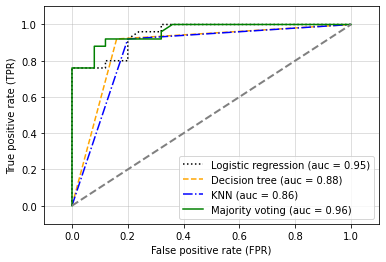

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Visualization
colors = ['black', 'orange', 'blue', 'green']
linestyles = [':', '--', '-.', '-']

for clf, label, clr, ls in zip(all_clf,
                               clf_labels,
                               colors, linestyles):

    y_pred = clf.fit(X_train, y_train).predict_proba(X_test)[:, 1]

    # ROC
    fpr, tpr, thresholds = roc_curve(y_true=y_test,
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)

    plt.plot(fpr, tpr, color=clr, linestyle=ls,
             label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],
         linestyle='--',
         color='gray', linewidth=2)
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')
plt.show()

The ROC result indicates that the ensemble classifier also performs well on the test set (ROC AUC = 0.95).

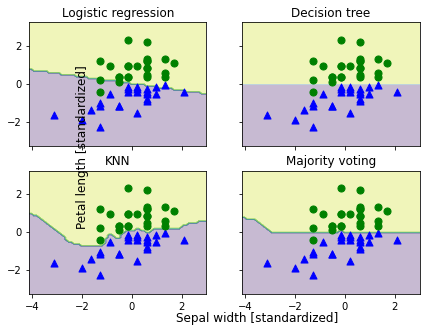

In [ ]:
from itertools import product

# In order to align the branches of the decision tree with Logistic and KNN for visualization purposes
sc = StandardScaler() # chuẩn hóa
X_train_std = sc.fit_transform(X_train)

x_min = X_train_std[:, 0].min() - 1
x_max = X_train_std[:, 0].max() + 1
y_min = X_train_std[:, 1].min() - 1
y_max = X_train_std[:, 1].max() + 1

# Create mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Subplot
f, axarr = plt.subplots(nrows=2, ncols=2,
                        sharex='col',
                        sharey='row', figsize=(7, 5))

# Training
for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        all_clf, clf_labels):
    clf.fit(X_train_std, y_train) #
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.3)
    axarr[idx[0], idx[1]].scatter(X_train_std[y_train==0, 0],
                                  X_train_std[y_train==0, 1],
                                  c='blue',
                                  marker='^', s=50)
    axarr[idx[0], idx[1]].scatter(X_train_std[y_train==1, 0],
    X_train_std[y_train==1, 1], c='green',
                                  marker='o', s=50)
    axarr[idx[0], idx[1]].set_title(tt)
plt.text(-3.5, -4.5, s='Sepal width [standardized]',
         ha='center', va='center', fontsize=12)
plt.text(-10.5, 4.5, s='Petal length [standardized]',
         ha='center', va='center',
         fontsize=12, rotation=90)
plt.show()

- The boundary of the Majority Vote looks very similar to the decision tree, perpendicular to the y-axis and with a boundary width ≥ 1.

- However, there is additional non-linearity from the KNN classifier

# Bagging

Bagging or Bootstrap Aggregating, is an ensemble learning technique that aims to improve the stability and accuracy of machine learning models. The basic idea behind bagging is to train multiple instances of a base model using different subsets of the training data, and then combine their predictions.

1. Read the data, LabelEncode, and split into train/test.

2. Specifically, the author uses DecisionTree to examine.

3. Initialize the DecisionTree classifier with parameters:

    - criterion: impurity measure, entropy or gini

    - max_depth: integer, limits the depth of the tree

4. Initialize the BaggingClassifier function with parameters:

    - base_estimator: the classifier initialized in step 2

    - n_estimators: the number of base_estimators

    - max_samples: integer, the number of samples drawn from X to train each base_estimator

    - max_features: similar to max_samples but for features

    - bootstrap: boolean variable, whether to apply replacement or not

    - bootstrap_features: similar to bootstrap but for each feature

5. Compare the accuracy between applying and not applying Bagging.

6. Plot the results.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',header=None)
df_wine.columns = ['Class label', 'Alcohol','Malic acid',
                   'Ash','Alcalinity of ash','Magnesium',
                   'Total phenols','Flavanoids', 'Nonflavanoid phenols',
                   'Proanthocyanins','Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines','Proline']
# drop 1 class
df_wine = df_wine[df_wine['Class label'] != 1]
y = df_wine['Class label'].values
X = df_wine[['Alcohol','OD280/OD315 of diluted wines']].values

Where the Class label column represents two features for wine classification: Alcohol concentration and OD280/OD315 of diluted wines.

In [ ]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
59,2,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520
60,2,12.33,1.10,2.28,16.0,101,2.05,1.09,0.63,0.41,3.27,1.25,1.67,680
61,2,12.64,1.36,2.02,16.8,100,2.02,1.41,0.53,0.62,5.75,0.98,1.59,450
62,2,13.67,1.25,1.92,18.0,94,2.10,1.79,0.32,0.73,3.80,1.23,2.46,630
63,2,12.37,1.13,2.16,19.0,87,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test =train_test_split(X, y,test_size=0.2,random_state=1,stratify=y)

In [ ]:
from sklearn.ensemble import BaggingClassifier
tree = DecisionTreeClassifier(criterion='entropy',random_state=1, max_depth=None)
bag = BaggingClassifier(base_estimator=tree,n_estimators=500,
                        max_samples=1.0,max_features=1.0,
                        bootstrap=True,bootstrap_features=False,
                        n_jobs=1, random_state=1)

In [ ]:
from sklearn.metrics import accuracy_score
tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)


tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f' % (tree_train, tree_test))

Decision tree train/test accuracies 1.000/0.833


In [ ]:
bag = bag.fit(X_train, y_train)
y_train_pred = bag.predict(X_train)
y_test_pred = bag.predict(X_test)
bag_train = accuracy_score(y_train, y_train_pred)
bag_test = accuracy_score(y_test, y_test_pred)
print('Bagging train/test accuracies %.3f/%.3f' % (bag_train, bag_test))

Bagging train/test accuracies 1.000/0.917


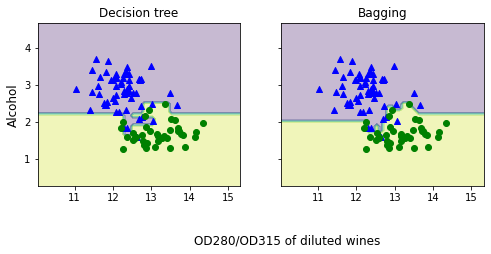

In [ ]:
x_min = X_train[:, 0].min() - 1
x_max = X_train[:, 0].max() + 1
y_min = X_train[:, 1].min() - 1
y_max = X_train[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Subplot
f, axarr = plt.subplots(nrows=1, ncols=2,
                        sharex='col',
                        sharey='row',
                        figsize=(8, 3))

# Training
for idx, clf, tt in zip([0, 1],
                        [tree, bag], # Decision Tree, Bagging Decision Tree
                        ['Decision tree', 'Bagging']):
    clf.fit(X_train, y_train)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) # Combine the two predictions based on the above two classifiers into a single vector
    Z = Z.reshape(xx.shape)

    axarr[idx].contourf(xx, yy, Z, alpha=0.3)
    axarr[idx].scatter(X_train[y_train==0, 0],
                      X_train[y_train==0, 1],
                      c='blue', marker='^')
    axarr[idx].scatter(X_train[y_train==1, 0],
                      X_train[y_train==1, 1],
                      c='green', marker='o')
    axarr[idx].set_title(tt)
axarr[0].set_ylabel('Alcohol', fontsize=12)
plt.text(10.2, -1.2,
        s='OD280/OD315 of diluted wines',
        ha='center', va='center', fontsize=12)
plt.show()

# Boosting

Boosting is an ensemble learning method that combines the predictions of multiple weak learners to create a strong learner. The key idea behind boosting is to sequentially train weak models, giving more emphasis to the instances that the previous models misclassified. This allows boosting algorithms to focus on the difficult-to-classify examples and improve overall performance.

1. Initialize the classification function.

2. Initialize the AdaBoostClassifier with parameters similar to the Bagging section.

3. Train and predict based on the classifiers in steps 1 and 2.

4. Calculate and compare the accuracy of steps 1 and 2.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
tree = DecisionTreeClassifier(criterion='entropy',
                              random_state=1,
                              max_depth=1)
ada = AdaBoostClassifier(base_estimator=tree,
                         n_estimators=500,
                         learning_rate=0.1,
                         random_state=1)
tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)
tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f'% (tree_train, tree_test))

ada = ada.fit(X_train, y_train)
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)
ada_train = accuracy_score(y_train, y_train_pred)
ada_test = accuracy_score(y_test, y_test_pred)
print('AdaBoost train/test accuracies %.3f/%.3f' % (ada_train, ada_test))

Decision tree train/test accuracies 0.916/0.875
AdaBoost train/test accuracies 1.000/0.917


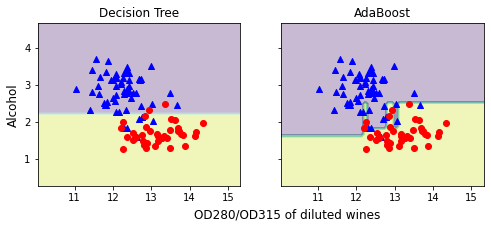

In [ ]:
x_min = X_train[:, 0].min() - 1
x_max = X_train[:, 0].max() + 1
y_min = X_train[:, 1].min() - 1
y_max = X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
np.arange(y_min, y_max, 0.1))
f, axarr = plt.subplots(1, 2,
                        sharex='col',
                        sharey='row',
                        figsize=(8, 3))
for idx, clf, tt in zip([0, 1],
                        [tree, ada],
                        ['Decision Tree', 'AdaBoost']):
  clf.fit(X_train, y_train)
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  axarr[idx].contourf(xx, yy, Z, alpha=0.3)
  axarr[idx].scatter(X_train[y_train==0, 0],
                     X_train[y_train==0, 1],
                     c='blue',
                     marker='^')
  axarr[idx].scatter(X_train[y_train==1, 0],
                     X_train[y_train==1, 1],
                     c='red',
                     marker='o')
  axarr[idx].set_title(tt)
  axarr[0].set_ylabel('Alcohol', fontsize=12)
plt.text(10.2, -0.5,
          s='OD280/OD315 of diluted wines',
          ha='center',
          va='center',
          fontsize=12)
plt.show()

# Reference:

***Python Machine Learning - Second Edition: Machine Learning and Deep Learning with Python, scikit-learn, and TensorFlow*** by Sebastian Raschka, Vahid Mirjalili  